In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataANN.csv')

In [3]:
data.shape

(70000, 14)

In [4]:
data

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
X = data.iloc[:, 1:13].values
y = data.iloc[:, 13].values

In [6]:
X

array([[1.83930000e+04, 5.03917808e+01, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.02280000e+04, 5.54191781e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.88570000e+04, 5.16630137e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90660000e+04, 5.22356164e+01, 2.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.24310000e+04, 6.14547945e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.05400000e+04, 5.62739726e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [7]:
y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [9]:
y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 1.5985301 ,  1.5985301 , -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152],
       [ 0.01419727,  0.01419727, -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152],
       [ 0.56581583,  0.56581583, -0.73535519, ..., -0.31159702,
        -0.23933665, -2.02362986],
       ...,
       [ 1.17782468,  1.17782468,  1.35988704, ..., -0.31159702,
        -0.23933665,  0.49416152],
       [-0.46933025, -0.46933025, -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152],
       [ 0.38302379,  0.38302379,  1.35988704, ..., -0.31159702,
        -0.23933665,  0.49416152]])

In [14]:
X_test

array([[-1.72779877, -1.72779877, -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152],
       [ 0.13619373,  0.13619373, -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152],
       [ 0.43936103,  0.43936103, -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152],
       ...,
       [ 1.21713916,  1.21713916,  1.35988704, ..., -0.31159702,
        -0.23933665, -2.02362986],
       [-1.96652275, -1.96652275,  1.35988704, ...,  3.20927329,
        -0.23933665,  0.49416152],
       [-0.22209489, -0.22209489, -0.73535519, ..., -0.31159702,
        -0.23933665,  0.49416152]])

In [15]:
X_train.shape

(56000, 12)

In [16]:
X_test.shape

(14000, 12)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import models
from keras import layers

In [18]:
classifier = models.Sequential()

In [19]:
classifier.add(layers.Dense(12, activation='relu' ,use_bias=True,name = 'input'))
classifier.add(layers.Dropout(rate=0.1))

In [20]:
classifier.add(layers.Dense(12, activation='relu',use_bias=True,name = 'hidden1'))
classifier.add(layers.Dropout(rate=0.1))

In [21]:
classifier.add(layers.Dense(1,  activation='sigmoid',use_bias=True,name = 'output'))

In [29]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = classifier.fit(X_train, y_train, batch_size=100, epochs=100,validation_split = 0.02)

Epoch 1/100
549/549 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7296 - val_loss: 0.5636 - val_accuracy: 0.7268
Epoch 2/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7301 - val_loss: 0.5645 - val_accuracy: 0.7188
Epoch 3/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7294 - val_loss: 0.5637 - val_accuracy: 0.7179
Epoch 4/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7296 - val_loss: 0.5643 - val_accuracy: 0.7241
Epoch 5/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7294 - val_loss: 0.5647 - val_accuracy: 0.7214
Epoch 6/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7310 - val_loss: 0.5638 - val_accuracy: 0.7205
Epoch 7/100
549/549 [==============================] - 2s 4ms/step - loss: 0.5496 - accuracy: 0.7319 - val_loss: 0.5636 - val_accuracy: 0.7214

Epoch 58/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5450 - accuracy: 0.7345 - val_loss: 0.5613 - val_accuracy: 0.7268
Epoch 59/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5461 - accuracy: 0.7335 - val_loss: 0.5616 - val_accuracy: 0.7223
Epoch 60/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7343 - val_loss: 0.5612 - val_accuracy: 0.7250
Epoch 61/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7334 - val_loss: 0.5613 - val_accuracy: 0.7259
Epoch 62/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7341 - val_loss: 0.5625 - val_accuracy: 0.7277
Epoch 63/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7331 - val_loss: 0.5629 - val_accuracy: 0.7241
Epoch 64/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7333 - val_loss: 0.5626 - val_accuracy:

In [31]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
hidden1 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 13        
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [32]:
classifier.weights

[<tf.Variable 'input/kernel:0' shape=(12, 12) dtype=float32, numpy=
 array([[ 3.83899808e-01,  1.69875354e-01,  1.31449610e-01,
         -5.87779820e-01,  2.34277979e-01, -1.80614993e-01,
         -4.30697612e-02, -4.36798662e-01,  3.78667116e-01,
          2.19583318e-01,  1.91744030e-01, -1.89905941e-01],
        [ 5.99754393e-01, -8.85015503e-02,  3.74571681e-01,
          2.10306183e-01, -2.19680190e-01,  1.69994906e-01,
          1.52537206e-04,  4.21699017e-01,  2.50457585e-01,
         -2.23337755e-01, -2.62025326e-01, -1.05706677e-01],
        [-1.71571448e-01,  1.20864145e-03,  2.18342021e-01,
         -2.10637208e-02, -7.51293777e-03,  1.07831676e-02,
          3.61952223e-02, -2.58291513e-02,  2.91432198e-02,
          7.97408447e-02,  1.52941672e-02, -9.51172411e-03],
        [ 9.13591310e-02,  1.28161669e-01, -1.54117823e-01,
         -5.98947778e-02, -1.02040470e-02, -1.29963206e-02,
          4.14380021e-02, -1.83649827e-02, -2.07286794e-02,
          6.34928867e-02,  1.

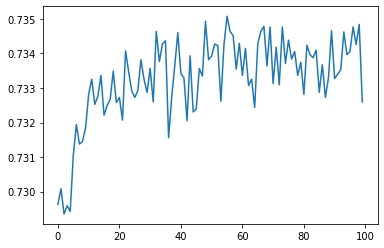

In [33]:
plt.plot(history.history['accuracy'])
plt.show()

In [34]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5428, 1641],
       [2085, 4846]], dtype=int64)

In [36]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/14000)*100))

Our accuracy is 73.38571428571429%
